In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [50]:
boston = datasets.load_boston()

In [51]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Prediction using max rooms

In [52]:
X_rooms = bos.RM.values.reshape(-1,1)
y_price = bos.PRICE.values.reshape(-1,1)


In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

In [54]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_train,Y_train)

0.4340897790637215

In [55]:
reg.score(X_test,Y_test)

0.6938399401553497

In [56]:
reg.coef_

array([[8.82345634]])

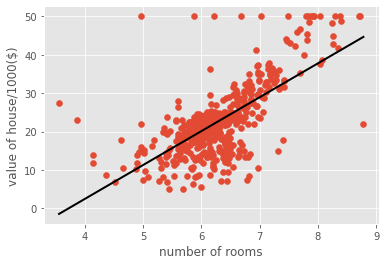

In [57]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 2)
plt.ylabel('value of house/1000($)')
plt.style.use("ggplot")
plt.xlabel('number of rooms')
plt.show()

### Prediction using all features (Except price)

In [63]:
X = bos.iloc[:,:-1].values
y = bos.PRICE.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [64]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
reg.score(X_train,Y_train)

0.738339392059052

In [65]:
reg.score(X_test,Y_test)

0.7334492147453064

In [66]:
reg.coef_

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])